In [10]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *
import pandas as pd


# Function to write a value and error in scinetific notation
def format_scientific(value, error, precision=1):
    if np.isnan(value):
        return
    power_error = int(("%E" % error)[-3:])  # -2
    power_value = int(("%E" % value)[-3:])  # -3
    dif = power_value - power_error  # -1
    if error > 100:
        return "({0} $\\pm$ {1})e{2}".format(
            round(value * 10 ** -(power_value - dif), max(precision + dif, 1)),
            round(error * 10 ** (-power_error), precision),
            power_error,
        )
    if error > 10:
        return f"{value:.{precision}f} $\\pm$ {error:.{precision}f}"
    if error > 1:
        return f"{value:.{precision}f} $\\pm$ {error:.{precision}f}"
    if error > 0.1:
        return f"{value:.{precision+1}f} $\\pm$ {error:.{precision+1}f}"
    # if error > 0.02:
    #    return f"{value:.{precision+2}f}$\\pm$ {error:.{precision+2}f}"
    return "({0} $\\pm$ {1})e{2}".format(
        round(value * 10 ** -(power_value - dif), max(precision + dif, 1)),
        round(error * 10 ** (-power_error), precision),
        power_error,
    )

/tmp/ipykernel_20548/454015756.py:12: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


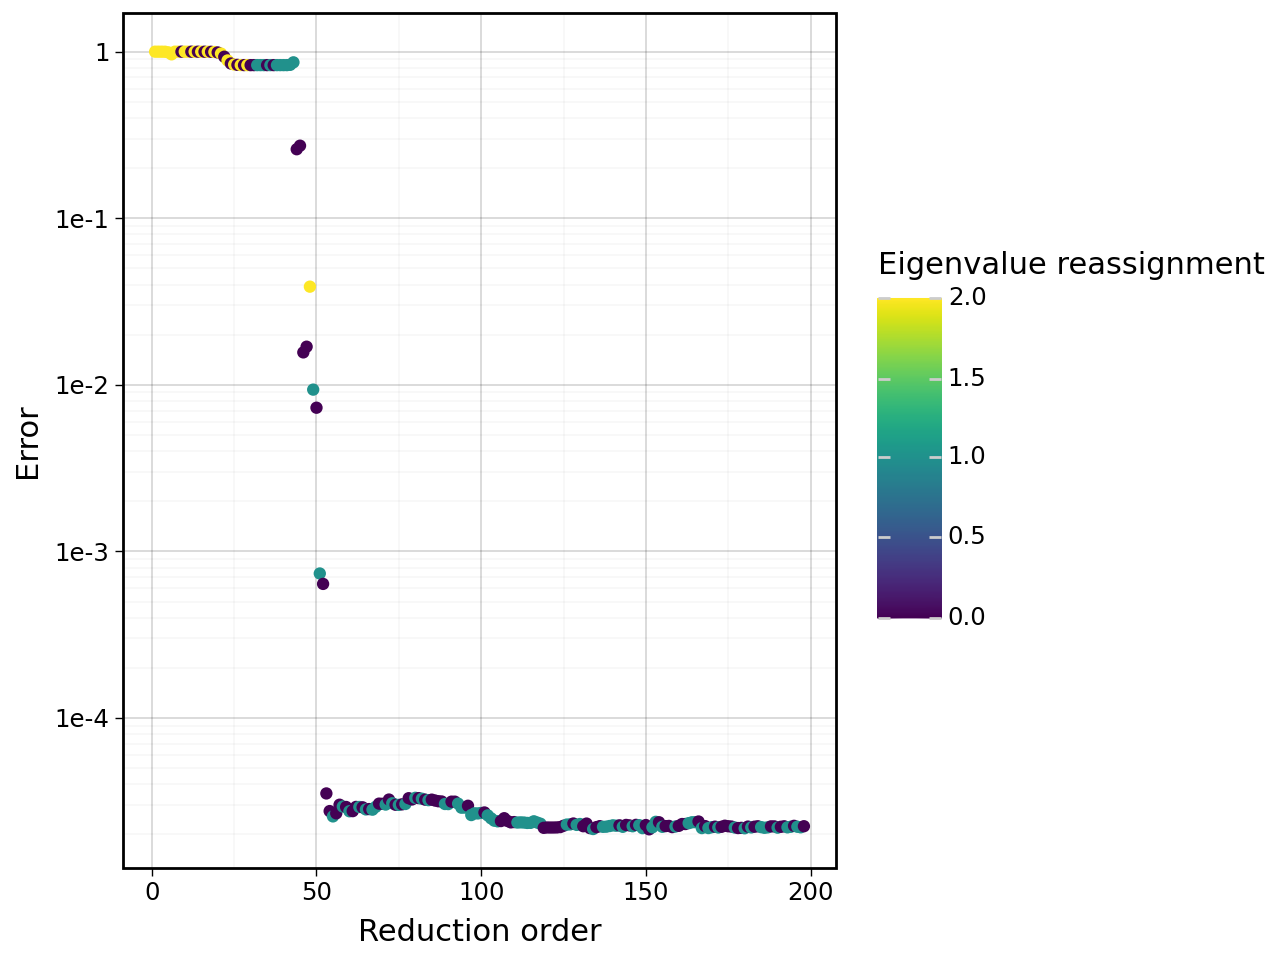

/home/jonathan/miniconda3/envs/mep/lib/python3.12/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/jonathan/miniconda3/envs/mep/lib/python3.12/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: ../writing/figures/chainBuildup_stiffness5_replacement.png


FileNotFoundError: [Errno 2] No such file or directory: '/home/jonathan/Documents/Master-AppliedPhysics/MEP/programming/POD/writing/figures/chainBuildup_stiffness5_replacement.png'

In [11]:
# Plot to show order buildup of stiffness 5 decay chain with reassignment
result = pd.read_csv("chainBuildup_stiffness5.csv")
plot = (
    ggplot(
        result,
        aes(x="Reduction order", y="Error", color="Eigenvalue reassignment"),
    )
    + geom_point()
    + scale_y_log10()
    + theme_linedraw()
)
print(plot)
ggsave(plot, "../writing/figures/chainBuildup_stiffness5_replacement.png", dpi=300)